<a href="https://colab.research.google.com/github/dxcim/Business-Analytics-Foundations/blob/main/m4_4_partitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 4 | Pattern discovery**

`m4_4_partitioning.ipynb` | 2025-03-25 11:36

# Evaluation fundamentals with Python

PyCaret handles a lot of the complexity of machine learning for you. It can automatically partition your data into training and test sets, and use the correct partition for each step of the modelling process.

Let's do another classification task, predicting customer churn. We'll use the same dataset as before, but this time we'll use PyCaret to compare multiple models, tune hyperparameters, and evaluate the final model on the test set.

## How to use this notebook


To run this notebook in Colab, choose **Runtime** from the top menu and then **Run all**. This will set up the notebook and then run all the cells.

The first run may take a few minutes to install the required libraries and download the data. Subsequent runs will be faster.

You can also run the cells one by one using the play button next to each cell.

---

This section of the notebook contains code to set up the notebook environment. It installs the required libraries, downloads the data, and sets the display style for charts.

After this section of the notebook runs successfully, you can hide the cells in this section. To do this in Colab, choose **View** from the top menu, then **Collapse sections**, or click the downward chevron ⌄ next to the section title.

You do not need to understand the code in the "How to use this notebook" section to follow the rest of the notebook.


In [1]:
# install PyCaret
# if prompted by Colab, restart the runtime after installing: Runtime -> Restart session

%pip install --upgrade --quiet pycaret

In [2]:
# download data

from urllib.request import urlretrieve
from pathlib import Path

if not Path("/content/customer_churn_numeric.csv").exists():
    urlretrieve("https://canvas.uts.edu.au/files/8948624/download?download_frd=1&verifier=9uzGTenHhCcY6WWUfonlnFDwCpeqpmAigJzKsp4U", "customer_churn_numeric.csv")

In [3]:
# format figures for display in Canvas

import seaborn as sns

sns.set_theme(style="white", rc={"figure.figsize": (12, 6)})
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})

# in Colab, if this cell fails with
# "ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject"
# first try restarting the runtime.
# Runtime menu -> Restart runtime, or press Ctrl-M then . (period) and confirm. Then re-run this cell.
# For Mac-using friends, the keyboard shortcut is ⌘-M then . (period).

## Load the data and set up the PyCaret session

In [4]:
import pandas as pd

# load the data
df = pd.read_csv('/content/customer_churn_numeric.csv')

For this example there is no separate file containing holdout data.

In [5]:
# manually keep 20% holdout data

holdout = df.sample(frac=0.2, random_state=22804)
df.drop(holdout.index, inplace=True)

This time we will specify how much of the data to use for training, and how to partition the data for cross-validation. We'll use 60% of the data for training, and 5-fold cross-validation.

In [6]:
from pycaret.classification import *

# set up a PyCaret classification session to predict customer churn
# specify 60% training data and 5-fold cross-validation
setup(data=df,
      target='Churn',    # target variable
      train_size=0.6,    # 60% training
      fold=5,            # 5-fold cross-validation
      session_id=22804)  # For reproducibility

,Description,Value
0,Session id,22804
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5634, 20)"
4,Transformed data shape,"(5634, 20)"
5,Transformed train set shape,"(3380, 20)"
6,Transformed test set shape,"(2254, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


## Build and evaluate the model

To continue exploring, we'll choose a specific model. We'll use a Random Forest model this time.

The model performance table has a row for each fold of cross-validation, and the final row is the average performance across all folds. Area under curve (AUC) is a common metric for classification tasks, and it ranges from 0 to 1, with higher values indicating better performance.

In [7]:
# Create specific model

model = create_model('rf')  # Random Forest

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7825,0.8177,0.4420,0.6349,0.5212,0.3863,0.3969
1,0.7944,0.8158,0.4751,0.6615,0.5531,0.4242,0.4340
2,0.7899,0.8377,0.4917,0.6403,0.5562,0.4217,0.4280
3,0.8033,0.8266,0.5028,0.6791,0.5778,0.4532,0.4619
4,0.7944,0.8386,0.5414,0.6364,0.5851,0.4496,0.4522
Mean,0.7929,0.8273,0.4906,0.6504,0.5587,0.4270,0.4346
Std,0.0067,0.0096,0.0327,0.0172,0.0224,0.0240,0.0225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

_Area under curve_ hints that there's an actual curve to look at. Let's plot it.

The ROC curve is a plot of the true positive rate (sensitivity) against the false positive rate (1 - specificity) for different threshold values. The AUC is the area under the ROC curve, and it's a measure of how well the model can distinguish between classes.

ROC is short for "receiver operating characteristic". Knowing this will not help you understand ROC curves, but it might come up in pub trivia someday.

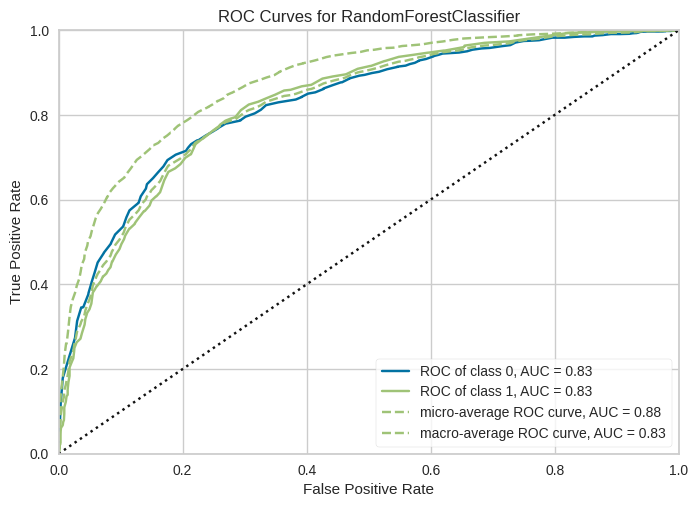

In [8]:
# show ROC curve

plot_model(model, plot='auc')

## Using cross-validation to improve the model

The model performance information shows that the Random Forest model has an AUC of 0.83. This is a good starting point, but we can try to improve it by tuning hyperparameters.

In [9]:
# Tune hyperparameters using 5 fold cross-validation
# This uses the 60% training data sample made by PyCaret

tuned_model = tune_model(model)
# technical note: `tune_model` uses X_train for tuning, I checked the source code

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7914,0.8149,0.4696,0.6538,0.5466,0.4159,0.4255
1,0.8047,0.8230,0.4862,0.6929,0.5714,0.4500,0.4618
2,0.8077,0.8682,0.5304,0.6809,0.5963,0.4726,0.4790
3,0.8062,0.8456,0.4475,0.7232,0.5529,0.4378,0.4584
4,0.7929,0.8321,0.5359,0.6340,0.5808,0.4446,0.4474
Mean,0.8006,0.8368,0.4939,0.6770,0.5696,0.4442,0.4544
Std,0.0070,0.0187,0.0343,0.0310,0.0182,0.0183,0.0177


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In this case, tuning the model improved the AUC to 0.84. This is a small improvement, but it's better than nothing.

## Evaluating the model on test data

It's time to evaluate the final model on the test set. PyCaret will use the best Random Forest model from the tuning step.

In [10]:
# Final evaluation on test set

test_predictions = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8035,0.8476,0.5083,0.6777,0.5809,0.4559,0.4640


The final model has the same performance on the test set. This is a good result, and it shows that the model is generalising well to new data.

## Evaluating the model on holdout data

PyCaret has evaluated the model using the test set that it made. Now it's our turn to evaluate PyCaret using the holdout data that we made!

The model has never seen this data before, so it's a good test of how well it generalises to new data.

In [11]:
# evaluate the model on holdout data

_ = predict_model(tuned_model, data=holdout)
# sidenote: assigning to _ says "I don't care about this value"
# this is a common convention in Python
# we use it here so the predictions dataframe isn't printed to the output

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7892,0.8321,0.4778,0.6121,0.5367,0.4029,0.4081


## Exercises

1. How does the model performance on holdout data compare to the test set? What does this tell you about the model?
2. Try a different percentage split for training and test data. Does it make any difference?
3. Build a model using a different algorithm. How does it compare to the Random Forest model?